In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('loan status.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.shape

(614, 13)

In [8]:
print('The number of rows',data.shape[0])
print('The number of columns',data.shape[1])

The number of rows 614
The number of columns 13


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.isnull().sum()*100/len(data)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Handling the missing values less than 5%

In [11]:
data=data.drop('Loan_ID',axis=1)

<Axes: >

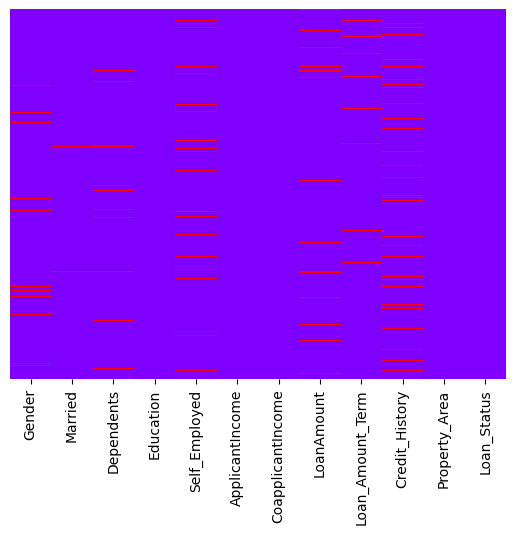

In [12]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='rainbow')

In [13]:
## droping the rows having missing values less than 5%
columns=['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [14]:
data=data.dropna(subset=columns)

In [15]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
data['Dependents']=data['Dependents'].replace(to_replace='3+',value='4')

In [17]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [18]:
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [19]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       48
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
data['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [21]:
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [22]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [24]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0}).astype('int')

In [25]:
data['Gender'].unique()

array([1, 0])

In [26]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [27]:
data['Married']=data['Married'].map({'Yes':1,'No':0}).astype('int')

In [28]:
data['Married'].unique()

array([1, 0])

In [29]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [30]:
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')

In [31]:
data['Education'].unique()

array([1, 0])

In [32]:
data['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [33]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')

In [34]:
data['Self_Employed'].unique()

array([0, 1])

In [35]:
data['Property_Area'].unique()

array(['Rural', 'Urban', 'Semiurban'], dtype=object)

In [36]:
data['Property_Area']=data['Property_Area'].map({'Rural':0,'Urban':1,'Semiurban':2}).astype('int')

In [37]:
data['Property_Area'].unique()

array([0, 1, 2])

In [38]:
data['Loan_Status'].unique()

array(['N', 'Y'], dtype=object)

In [39]:
data['Loan_Status']=data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [40]:
data['Loan_Status'].unique()

array([0, 1])

In [41]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [42]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [43]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1


In [44]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 553, dtype: int32

In [45]:
cols=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[cols]=scaler.fit_transform(x[cols])

In [47]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.411075,-0.545638,-0.893134,0.279961,1.0,0
610,1,1,4,1,0,-0.208727,-0.545638,-1.262287,-2.468292,1.0,0
611,1,1,1,1,0,0.456706,-0.466709,1.274152,0.279961,1.0,1
612,1,1,2,1,0,0.374659,-0.545638,0.488213,0.279961,1.0,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [49]:
model_data={}
def model_val(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    score=cross_val_score(model,x,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_data[model]=round(np.mean(score)*100,2)

In [50]:
model_data

{}

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
model=LogisticRegression()
model_val(model,x,y)

LogisticRegression() accuracy is 0.8132530120481928
LogisticRegression() Avg cross val score is 0.8047829647829647


In [53]:
from sklearn import svm


In [54]:
model=svm.SVC()
model_val(model,x,y)

SVC() accuracy is 0.8072289156626506
SVC() Avg cross val score is 0.7938902538902539


In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model=DecisionTreeClassifier()
model_val(model,x,y)

DecisionTreeClassifier() accuracy is 0.7228915662650602
DecisionTreeClassifier() Avg cross val score is 0.7215724815724815


In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model=RandomForestClassifier()
model_val(model,x,y)


RandomForestClassifier() accuracy is 0.7891566265060241
RandomForestClassifier() Avg cross val score is 0.7794430794430796


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
model=GradientBoostingClassifier()
model_val(model,x,y)

GradientBoostingClassifier() accuracy is 0.8192771084337349
GradientBoostingClassifier() Avg cross val score is 0.7685667485667484


In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [62]:
# Save the Model

In [63]:
x=data.drop("Loan_Status",axis=1)
y=data['Loan_Status']

In [64]:
rf=RandomForestClassifier(n_estimators=270,
                         min_samples_split=5,
                         min_samples_leaf=5,
                         max_features='sqrt',
                         max_depth=5)

In [65]:
rf.fit(x,y)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=270)

In [66]:
import joblib

In [67]:
joblib.dump(rf,'loan_status_predict')

['loan_status_predict']

In [68]:
model=joblib.load("loan_status_predict")

In [69]:
data=pd.DataFrame({
    'Gender':1,
    'Married':1,
    'Dependents':2,
    'Education':0,
    'Self_Employed':0,
    'ApplicantIncome':2889,
    'CoapplicantIncome':0.0,
    'LoanAmount':45,
    'Loan_Amount_Term':180,
    'Credit_History':0,
    'Property_Area':1
},index=[0])

In [70]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,2,0,0,2889,0.0,45,180,0,1


In [71]:
result=model.predict(data)

In [72]:
if result==1:
    print("Loan Approved")
else:
    print("Loan Not Approved")

Loan Not Approved


In [73]:
##GUI

In [74]:
from tkinter import *
import joblib

In [ ]:
def show_entry():
    
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    p7=float(e7.get())
    p8=float(e8.get())
    p9=float(e9.get())
    p10=float(e10.get())
    p11=float(e11.get())
    
    model =joblib.load("loan_status_predict")
    data=pd.DataFrame({
        'Gender':p1,
        'Married':p2,
        'Dependents':p3,
        'Education':p4,
        'Self_Employed':p5,
        'ApplicantIncome':p6,
        'CoapplicantIncome':p7,
        'LoanAmount':p8,
        'Loan_Amount_Term':p9,
        'Credit_History':p10,
        'Property_Area':p11
    },index=[0])
    result=model.predict(data)
        
    if result==1:
        Label(master,text="Loan approved").grid(row=31)
    else:
        Label(master,text="Loan not approved").grid(row=31)
            
master=Tk()
master.title("Loan Status Prediction Using Machine Learning")
label=Label(master,text='Loan Status Prediction',bg="black",
            fg="white").grid(row=0,columnspan=2)

Label(master,text="Gender [1:Male,0:Female]").grid(row=1)
Label(master,text="Married [1:Yes,0:No]").grid(row=2)
Label(master,text="Dependents [1,2,3,4]").grid(row=3)
Label(master,text="Education").grid(row=4)
Label(master,text="Self_Employed").grid(row=5)
Label(master,text="ApplicantIncome").grid(row=6)
Label(master,text="CoapplicantIncome").grid(row=7)
Label(master,text="LoanAmount").grid(row=8)
Label(master,text="Loan_Amount_Term").grid(row=9)
Label(master,text="Credit_History").grid(row=10)
Label(master,text="Property_Area").grid(row=11)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)
e7=Entry(master)
e8=Entry(master)
e9=Entry(master)
e10=Entry(master)
e11=Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)

Button(master,text='Predict',command=show_entry).grid()

mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\harpr\OneDrive\Pictures\python\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\harpr\AppData\Local\Temp\ipykernel_18860\359490038.py", line 6, in show_entry
    p4=float(e4.get())
ValueError: could not convert string to float: 'MBA'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\harpr\OneDrive\Pictures\python\lib\tkinter\__init__.py", line 1921, in __call__
    return self.func(*args)
  File "C:\Users\harpr\AppData\Local\Temp\ipykernel_18860\359490038.py", line 7, in show_entry
    p5=float(e5.get())
ValueError: could not convert string to float: 'Yes'
